<a href="https://colab.research.google.com/github/mohamed-azzam/Seattle-Airbnb-Udacity-Project/blob/gh-pages/Seattle_Airbnb_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

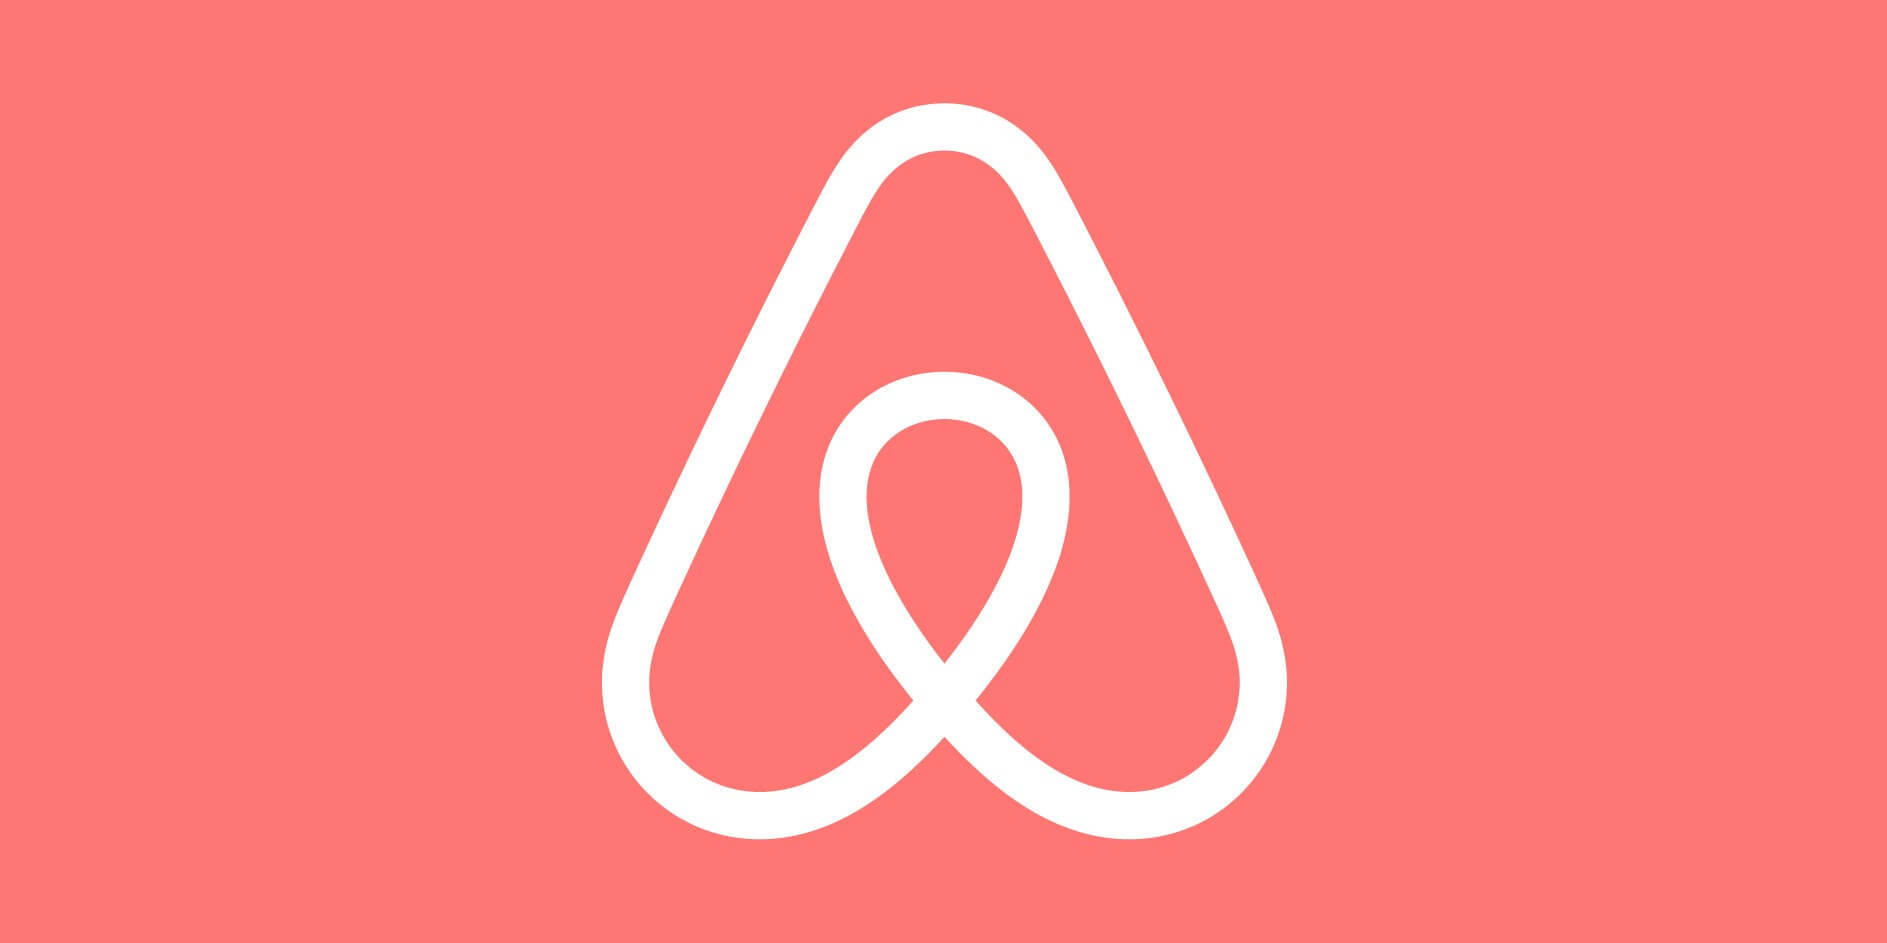

In [ ]:
from IPython import display
display.Image("/content/AIRBNB-LOGO.jpg", )

In [55]:
# unzip file 
import zipfile
with zipfile.ZipFile('/content/drive/MyDrive/Colab Notebooks/Data Sets/Seattle Airbnb Open Data.zip', 'r') as myzip:
    myzip.extractall()

# Table of Content
* [Introduction](#Introduction)
    * [Context](#Context)
    * [Content](#Content)
    * [Inspiration](#Inspiration)
    * [Acknowledgement](#Acknowledgement)
    
    
* [Data Wrangling](#Data_Wrangling)
    * [Calender](#Calender_Dataset)
    * [Reviews](#Reviews_Dataset)
    * [Listings](#Listings_Dataset)
    

* [Data Analysis](#Data_Analysis)

* [Predict the price](#Predict_the_price)
    * [Train Test Split](#Train_Test_Split)
    

# Introduction

## Context

Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Seattle, WA.

## Content

The following Airbnb activity is included in this Seattle dataset:
* Listings, including full descriptions and average review score
* Reviews, including unique id for each reviewer and detailed comments
* Calendar, including listing id and the price and availability for that day

## Inspiration

Can you describe the vibe of each Seattle neighborhood using listing descriptions?
What are the busiest times of the year to visit Seattle? By how much do prices spike?
Is there a general upward trend of both new Airbnb listings and total Airbnb visitors to Seattle?
For more ideas, visualizations of all Seattle datasets can be found [here](http://insideairbnb.com/seattle/).

## Acknowledgement

This dataset is part of Airbnb Inside, and the original source can be found [here](http://insideairbnb.com/get-the-data.html).

In [ ]:
import pandas as pd
import re

In [ ]:
df_calender = pd.read_csv('/content/calendar.csv')
df_calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [ ]:
df_listings = pd.read_csv('/content/listings.csv')
df_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [ ]:
df_reviews = pd.read_csv('/content/reviews.csv')
df_reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


# Data_Wrangling

## Calender_Dataset

In [ ]:
df_calender.head(2)

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00


In [ ]:
df_calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


In [ ]:
# check duplicated values
df_calender[df_calender.duplicated()]

,listing_id,date,available,price


In [ ]:
df_calender.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [ ]:
# convert date column type to date 
df_calender['date'] = pd.to_datetime(df_calender['date'])
# check
type(df_calender.date.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# convert listing_id type to string
df_calender['listing_id'] = df_calender['listing_id'].astype(str)
# check
type(df_calender.listing_id.iloc[0])

str

In [ ]:
# === price column === 

# replace the nan value in price to 0
df_calender['price'].fillna(0, inplace=True)

# remove the symbols in price
def remove_symbol(price):
    """remove the symbols ['$', ','] in price"""
    if type(price) is str:
        return re.sub("[\$,]",'',price)
    return price
    
df_calender['price'] = df_calender.price.apply(remove_symbol)

# convert the price type to float
df_calender['price'] = df_calender['price'].astype(float)

In [ ]:
# check
df_calender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1393570 non-null  object        
 1   date        1393570 non-null  datetime64[ns]
 2   available   1393570 non-null  object        
 3   price       1393570 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 42.5+ MB


## Reviews_Dataset

In [ ]:
df_reviews.head(2)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...


In [ ]:
# check duplicated values
df_reviews[df_reviews.duplicated()]

,listing_id,id,date,reviewer_id,reviewer_name,comments


In [ ]:
df_reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [ ]:
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84849 entries, 0 to 84848
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     84849 non-null  int64 
 1   id             84849 non-null  int64 
 2   date           84849 non-null  object
 3   reviewer_id    84849 non-null  int64 
 4   reviewer_name  84849 non-null  object
 5   comments       84831 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.9+ MB


In [ ]:
# convert listing_id type to string
df_reviews['listing_id'] = df_reviews['listing_id'].astype(str)
# check
type(df_reviews.listing_id.iloc[0])

str

In [ ]:
# convert id type to string
df_reviews['id'] = df_reviews['id'].astype(str)
# check
type(df_reviews.id.iloc[0])

str

In [ ]:
# convert date column type to date 
df_reviews['date'] = pd.to_datetime(df_reviews['date'])
# check
type(df_reviews.date.iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

In [ ]:
# drop review_id and reveiew_name 
df_reviews.drop(['reviewer_id', 'reviewer_name'], axis=1, inplace=True)

In [ ]:
# reomove null rows
df_reviews.dropna(subset=['comments'], inplace=True)

In [ ]:
# check 
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84831 entries, 0 to 84848
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   listing_id  84831 non-null  object        
 1   id          84831 non-null  object        
 2   date        84831 non-null  datetime64[ns]
 3   comments    84831 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 3.2+ MB


## Listings_Dataset

In [ ]:
df_listings.head(2)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48


In [ ]:
# take the important columns
df_listings_1 = df_listings[['id','host_response_time','host_response_rate','accommodates','bathrooms','bedrooms','beds','price','weekly_price','monthly_price'
,'cleaning_fee','extra_people','minimum_nights','review_scores_rating','instant_bookable']]

In [ ]:
df_listings_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3818 non-null   int64  
 1   host_response_time    3295 non-null   object 
 2   host_response_rate    3295 non-null   object 
 3   accommodates          3818 non-null   int64  
 4   bathrooms             3802 non-null   float64
 5   bedrooms              3812 non-null   float64
 6   beds                  3817 non-null   float64
 7   price                 3818 non-null   object 
 8   weekly_price          2009 non-null   object 
 9   monthly_price         1517 non-null   object 
 10  cleaning_fee          2788 non-null   object 
 11  extra_people          3818 non-null   object 
 12  minimum_nights        3818 non-null   int64  
 13  review_scores_rating  3171 non-null   float64
 14  instant_bookable      3818 non-null   object 
dtypes: float64(4), int64(

In [ ]:
# convert id type to string
df_listings_1['id'] = df_listings_1['id'].astype(str)
# check
type(df_listings_1.id.iloc[0])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


str

In [ ]:
# impute the nan value with mode
df_listings_1.beds.fillna(df_listings_1.beds.mode()[0], inplace=True)

# covert the beds to int
df_listings_1['beds'] = df_listings_1.beds.astype(int)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [ ]:
# === price column === 

# replace the nan value in price to 0
df_listings_1['price'].fillna(0, inplace=True)

# remove the symbols in price
def remove_symbol(price):
    """remove the symbols ['$', ','] in price"""
    if type(price) is str:
        return re.sub("[\$,]",'',price)
    return price
    
df_listings_1['price'] = df_listings_1.price.apply(remove_symbol)

# convert the price type to float
df_listings_1['price'] = df_listings_1['price'].astype(float)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:4536: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/in

In [ ]:
# check
df_listings_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    3818 non-null   object 
 1   host_response_time    3295 non-null   object 
 2   host_response_rate    3295 non-null   object 
 3   accommodates          3818 non-null   int64  
 4   bathrooms             3802 non-null   float64
 5   bedrooms              3812 non-null   float64
 6   beds                  3818 non-null   int64  
 7   price                 3818 non-null   float64
 8   weekly_price          2009 non-null   object 
 9   monthly_price         1517 non-null   object 
 10  cleaning_fee          2788 non-null   object 
 11  extra_people          3818 non-null   object 
 12  minimum_nights        3818 non-null   int64  
 13  review_scores_rating  3171 non-null   float64
 14  instant_bookable      3818 non-null   object 
dtypes: float64(4), int64(

In [ ]:
df_listings_1.head()

,id,host_response_time,host_response_rate,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,cleaning_fee,extra_people,minimum_nights,review_scores_rating,instant_bookable
0,241032,within a few hours,96%,4,1.0,1.0,1,85.0,NaN,NaN,NaN,$5.00,1,95.0,f
1,953595,within an hour,98%,4,1.0,1.0,1,150.0,"$1,000.00","$3,000.00",$40.00,$0.00,2,96.0,f
2,3308979,within a few hours,67%,11,4.5,5.0,7,975.0,NaN,NaN,$300.00,$25.00,4,97.0,f
3,7421966,NaN,NaN,3,1.0,0.0,2,100.0,$650.00,"$2,300.00",NaN,$0.00,1,NaN,f
4,278830,within an hour,100%,6,2.0,3.0,3,450.0,NaN,NaN,$125.00,$15.00,1,92.0,f


In [ ]:
# check duplicated values
df_listings_1[df_listings_1.duplicated()]

,id,host_response_time,host_response_rate,accommodates,bathrooms,bedrooms,beds,price,weekly_price,monthly_price,cleaning_fee,extra_people,minimum_nights,review_scores_rating,instant_bookable


In [ ]:
# covert percentage to float in host_response_rate column
def p2f(x):
    if type(x) is str:
        return float(x.strip('%'))/100
    return 1

df_listings_1['host_response_rate'] = df_listings_1.host_response_rate.apply(p2f)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


# Data_Analysis

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
plt.rcParams['figure.figsize'] = (10,5)
# set title for plot
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }
base_color = sns.color_palette()[0]

In [ ]:
df_calender.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,85.0
1,241032,2016-01-05,t,85.0
2,241032,2016-01-06,f,0.0
3,241032,2016-01-07,f,0.0
4,241032,2016-01-08,f,0.0


In [ ]:
month = df_calender[df_calender.date.dt.year == 2017]['date'].dt.month.unique()
month = df_calender.date.dt.year
df_calender.groupby([month, 'available']).count()['listing_id']

date  available
2016  f            457090
      t            928844
2017  f              1938
      t              5698
Name: listing_id, dtype: int64

## What is the occupancy rate during 2016 at the level of months?

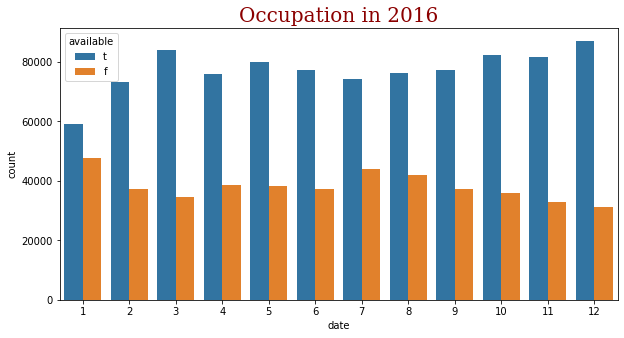

In [58]:
df_calender_2016 = df_calender[df_calender.date.dt.year == 2016]
month = df_calender_2016.date.dt.month
sns.countplot(data = df_calender, x = month, hue = 'available');
plt.title('Occupation in 2016', fontdict=font);

we can notice from the graph that the occupation rate at level of months during 2016 is low specially in months 3,10,11 and 12

## What is the most features affect on the price?

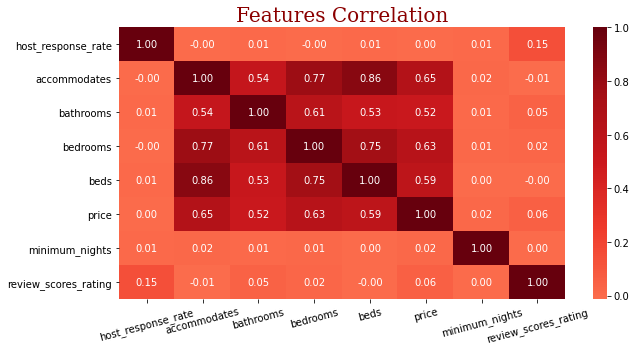

In [ ]:
corr = df_listings_1.corr()

kot = corr[corr.apply(lambda x: abs(x)>=0)]

sns.heatmap(kot, annot = True, fmt = '.2f', cmap = 'Reds', center = 0)
plt.title('Features Correlation', fontdict=font);
plt.xticks(rotation = 15);

**Investigate**: we can see that a lot of quantitative feature effect on the price like nu of beds, bathrooms, bedrooms and accommodates

## What is the average price per months?

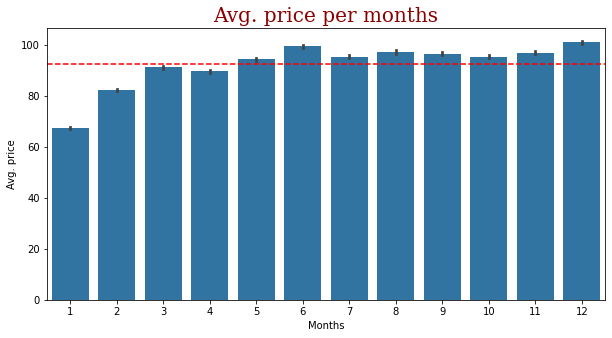

In [ ]:
sns.barplot(data = df_calender_2016, x = month, y = 'price',color=base_color)
plt.ylabel('Avg. price')
plt.xlabel('Months')
plt.title('Avg. price per months', fontdict=font);
plt.axhline(df_calender_2016.price.mean(), linestyle='--', color='red');

**Investigate**: we can notice that the price is increased from June month to December especially in December 

## What is the AVg. host response rate?

In [ ]:
print(f"The Avg. host response rate is {round(df_listings_1.host_response_rate.mean(),2)}")

The Avg. host response rate is 0.96


**Investigate**: we can see that the host response rate is 96% which is very good in this city

## What is the most host response time?

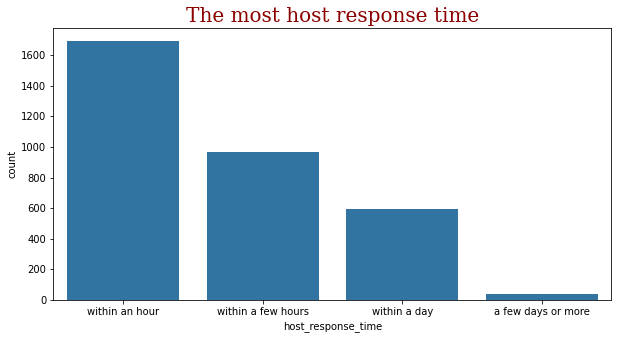

In [ ]:
# df_listings_1.host_response_time.value_counts()
cat_order = df_listings_1['host_response_time'].value_counts().index
sns.countplot(data = df_listings_1, x = 'host_response_time', color=base_color, order=cat_order)
plt.title('The most host response time', fontdict=font);

**Investigate**: we can see that the most host response time is within an hour